<a href="https://colab.research.google.com/github/toxtli/autoencoder-perceptron-mnist-svm/blob/master/autoencoder_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input, Dense
from keras.optimizers import RMSprop
from keras import backend as K
from keras.models import Model
from keras.datasets import mnist
from keras import regularizers

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import learning_curve

import numpy as np
import matplotlib.pyplot as plt

def plot_traincurve(history):
    colors = {'loss':'r', 'acc':'b', 'val_loss':'m', 'val_acc':'g'}
    plt.figure(figsize=(10,6))
    plt.title("Training Curve") 
    plt.xlabel("Epoch")

    for measure in history.keys():
        color = colors[measure]
        ln = len(history[measure])
        plt.plot(range(1,ln+1), history[measure], color + '-', label=measure)  # use last 2 values to draw line

    plt.legend(loc='upper left', scatterpoints = 1, frameon=False)
    
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# Neural network original data

11493376/11490434 [==============================] - 2s 0us/step
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate

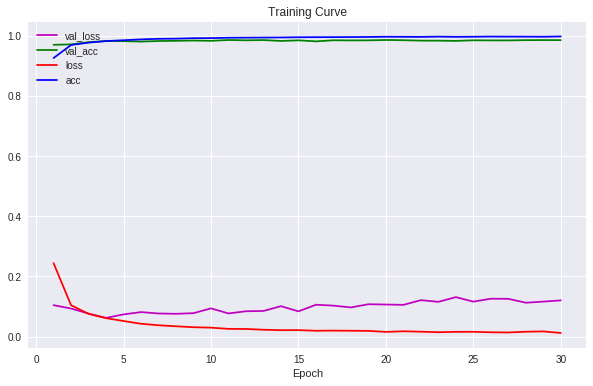

In [3]:
batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_traincurve(history.history)

# Autoencoder

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.3480 - val_loss: 0.2676
Epoch 2/30
60000/60000 [==============================] - 1s 23us/step - loss: 0.2574 - val_loss: 0.2436
Epoch 3/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.2329 - val_loss: 0.2202
Epoch 4/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.2129 - val_loss: 0.2033
Epoch 5/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.1985 - val_loss: 0.1912
Epoch 6/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.1879 - val_loss: 0.1820
Epoch 7/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.1797 - val_loss: 0.1746
Epoch 8/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.1729 - val_loss: 0.1683
Epoch 9/30
60000/60000 [==============================] - 1s 22us/step - loss: 0.1670 - val_loss: 0.1630
Epoch

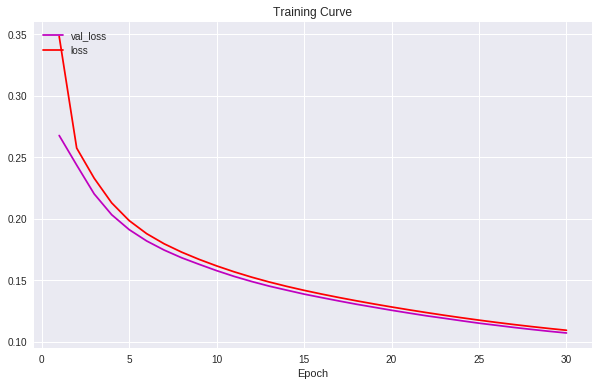

In [10]:
# this is the size of our encoded representations
encoding_dim = 60  

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

history = autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
plot_traincurve(history.history)

encoded_imgs_train = encoder.predict(x_train)
encoded_imgs_test = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs_test)

encoded_imgs_train_normalized = encoded_imgs_train / np.max(encoded_imgs_train)
encoded_imgs_test_normalized = encoded_imgs_test / np.max(encoded_imgs_test)

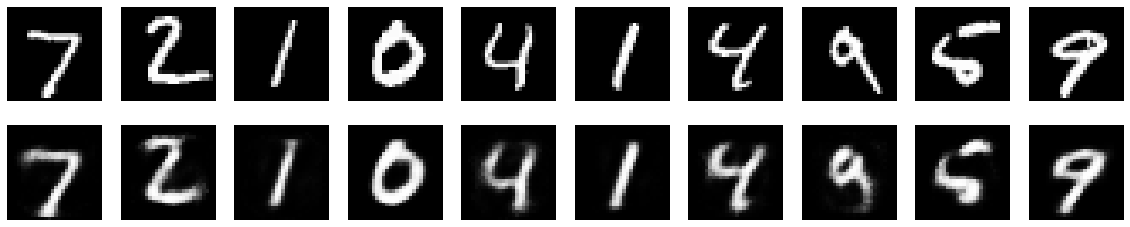

In [11]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Neural network encoded data

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               31232     
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 299,018
Trainable params: 299,018
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.5525 

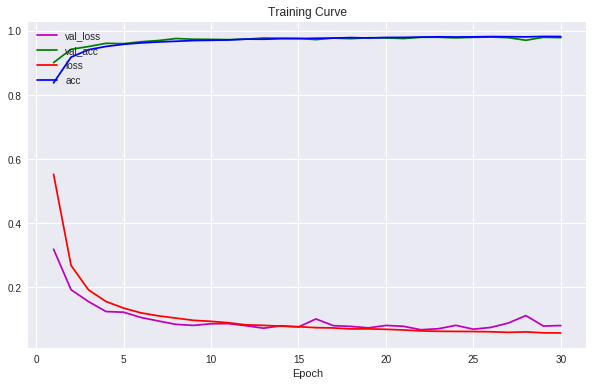

In [14]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(encoding_dim,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(encoded_imgs_train_normalized, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(encoded_imgs_test_normalized, y_test))
score = model.evaluate(encoded_imgs_test_normalized, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
plot_traincurve(history.history)

# Logistic Regression original data

In [0]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, np.argmax(y_train, axis=1))
score = logisticRegr.score(x_test, np.argmax(y_test, axis=1))
print(score)

# Logistic Regression encoded data

In [0]:
logisticRegr = LogisticRegression()
logisticRegr.fit(encoded_imgs_train_normalized, np.argmax(y_train, axis=1))
score = logisticRegr.score(encoded_imgs_test_normalized, np.argmax(y_test, axis=1))
print(score)

# SVM original data

Linear SVM accuracy:  0.918


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

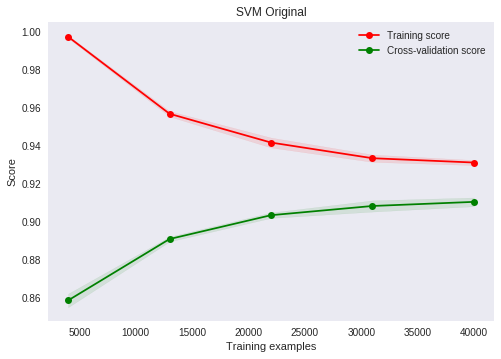

In [15]:
clf_svm = LinearSVC()
clf_svm.fit(x_train, np.argmax(y_train, axis=1))
y_pred_svm = clf_svm.predict(x_test)
acc_svm = accuracy_score(np.argmax(y_test, axis=1), y_pred_svm)
print("Linear SVM accuracy: ",acc_svm)
plot_learning_curve(clf_svm, "SVM Original", x_train, np.argmax(y_train, axis=1))

# SVM encoded data

Linear SVM accuracy:  0.8986


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

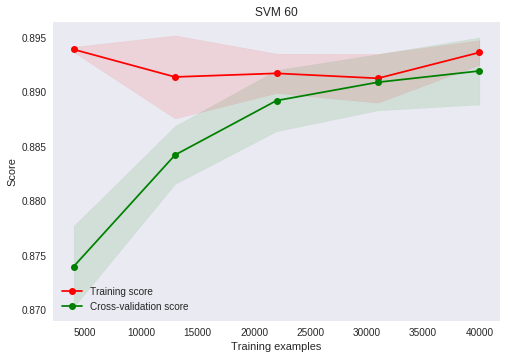

In [12]:
clf_svm = LinearSVC()
clf_svm.fit(encoded_imgs_train_normalized, np.argmax(y_train, axis=1))
y_pred_svm = clf_svm.predict(encoded_imgs_test_normalized)
acc_svm = accuracy_score(np.argmax(y_test, axis=1), y_pred_svm)
print("Linear SVM accuracy: ",acc_svm)
plot_learning_curve(clf_svm, "SVM 60", encoded_imgs_train_normalized, np.argmax(y_train, axis=1))

# Random Forest original data

In [0]:
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, np.argmax(y_train, axis=1))
y_pred_rf = clf_rf.predict(x_test)
acc_rf = accuracy_score(np.argmax(y_test, axis=1), y_pred_rf)
print("random forest accuracy: ",acc_rf)

# Random Forest encoded data

In [0]:
clf_rf = RandomForestClassifier()
clf_rf.fit(encoded_imgs_train_normalized, np.argmax(y_train, axis=1))
y_pred_rf = clf_rf.predict(encoded_imgs_test_normalized)
acc_rf = accuracy_score(np.argmax(y_test, axis=1), y_pred_rf)
print("random forest accuracy: ",acc_rf)